In [7]:
import numpy as np
from autograd import numpy as anp
# from autograd import jacobian, hessian
import  matplotlib.pyplot as plt
from python_files.maxent import MaxEnt
# from scipy.stats import norm, laplace
# from inflection import underscore

In [13]:
def f_pareto(x,a,xm):
    return np.array([anp.log(x)])

def b(a,xm):
    return np.array([1/a + anp.log(xm)])

def pdf_pareto(x,a,xm):
    return a*(xm**a) / (x**(a+1))

def cdf_pareto(x,a,xm):
    return 1- (xm/x)**a

def to_lagrange_pareto(a,xm):
    return [-a-1]


In [8]:
def convergence_plot(X, Y, Z, xlab="Parameter 1", ylab="Parameter 2", title="Convergence indicator", save_as=None):
    fig, ax = plt.subplots() 
    
    ax.set_title(title) 
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

    cset1 = ax.contourf(X,Y,Z,levels=1)
    fig.colorbar(cset1, ax=ax)

    if(save_as is not None):
        plt.savefig(save_as) 
    plt.show() 

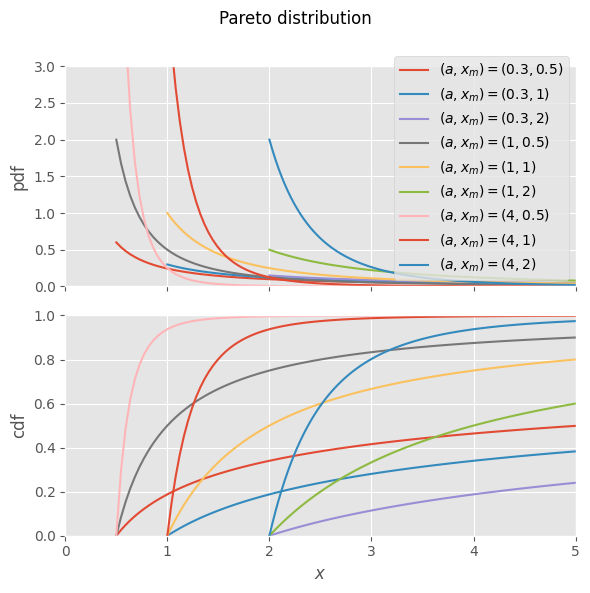

In [9]:
y_max = 5

with plt.style.context("ggplot"):
    fig, ax = plt.subplots(2,1,sharex=True, figsize=(6,6))
    ax[1].set_xlabel("$x$")
    ax[0].set_ylabel("pdf")
    ax[1].set_ylabel("cdf")
    ax[1].set_xlim((0,y_max))
    ax[0].set_ylim((0,3))
    ax[1].set_ylim((0,1))

    for i, a in enumerate([.3,1,4]):
        for j, xm in enumerate([.5,1,2]):
            xx = np.linspace(xm,y_max,100)
            ax[0].plot(xx,pdf_pareto(xx,a,xm), label=f"$(a,x_m)=({a},{xm})$")
            ax[1].plot(xx,cdf_pareto(xx,a,xm))

    ax[0].legend()
    fig.suptitle("Pareto distribution")
    plt.tight_layout()
    plt.show()


The resulting parameters:
  Lambda_1 = -3.997


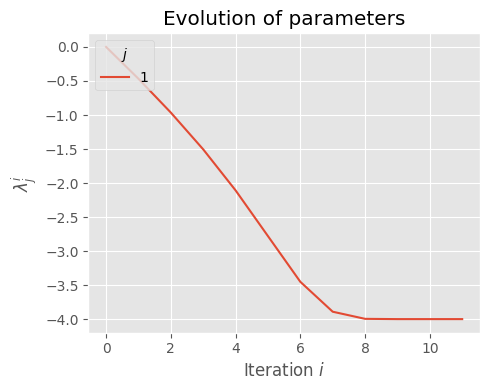

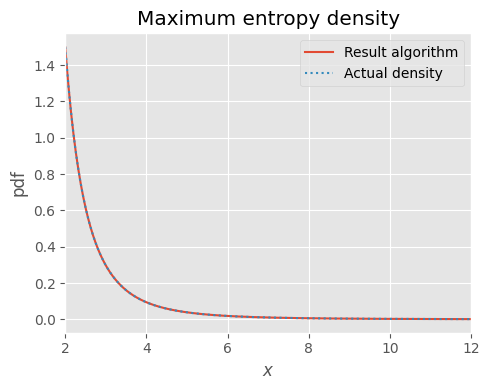

The (Euclidian) distance between result and actual parameter:
2.983e-03


In [16]:
a  = 3                              #>0
xm = 2                              #>0

l,u = xm,xm+40                 #bounds for calculating
n = 180                             #amount of points of Gaussian quadrature


ob_pareto = MaxEnt((l,u),n,b(a,xm),f_pareto, f_param=[a,xm])
ob_pareto.visualize_algorithm()
ob_pareto.visualize_solution(xlim=(l,l+10), actual_density=pdf_pareto, actual_param=(a,xm),
                             actual_lambda=to_lagrange_pareto(a,xm))

In [18]:
N_a = 20
N_u = 40

arr_a = np.linspace(0.1, 1, N_a)
arr_u = np.linspace(5, 500, N_u)
As, Us = np.meshgrid(arr_a,arr_u)

convergence_indicator_mat = np.zeros((N_a,N_u))

xm = 2 #>0
n = 100
l = xm+0.01

for i in range(N_a):
    a = arr_a[i]
    for j in range(N_u):
        u = arr_u[j]
        ob_pareto = MaxEnt((l,u),n,b(a,xm),f_pareto, f_param=[a,xm],warning_convergence=False)
        if(ob_pareto.get_converges()):
            convergence_indicator_mat[i][j] = 1
        else:
            convergence_indicator_mat[i][j] = 0

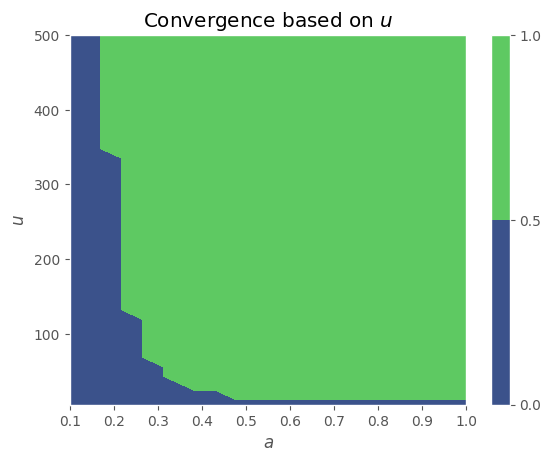

In [19]:
convergence_plot(As,Us,convergence_indicator_mat.T,xlab="$a$",ylab="$u$",title="Convergence based on $u$",save_as="conv_plot_a_u.pdf")

In [20]:
outside_interval = 1-cdf_pareto(Us,As,xm)+cdf_pareto(l,As,xm)

In [21]:
np.max(outside_interval)

np.float64(0.9129421663494085)

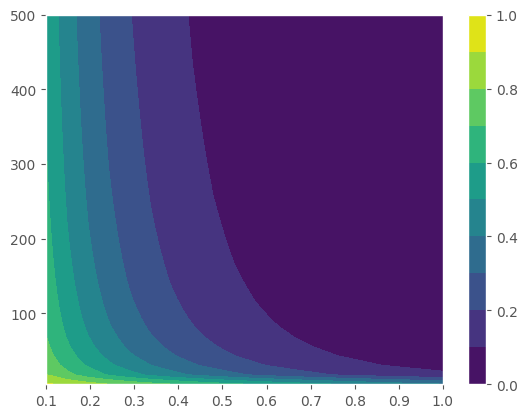

In [22]:
fig, ax=plt.subplots()
levels = np.linspace(0.0, 1.0, 11)
cset1= ax.contourf(As,Us, outside_interval, levels=levels)
cset1.set_clim(0, 1.0)
fig.colorbar(cset1, ax=ax)

plt.show()

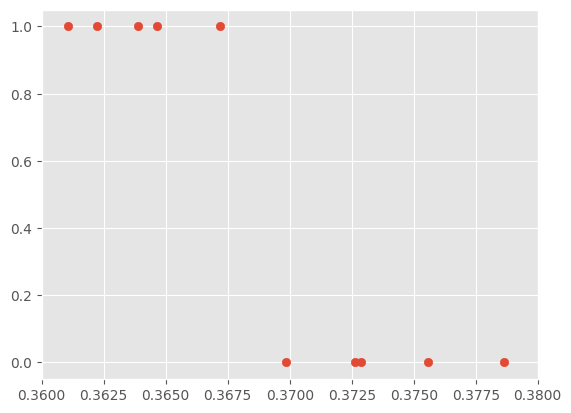

(40, 20) (20, 40)
min value which doesn't converge: 0.3698654552906875
max value which does converge:    0.36720366064512


In [23]:
plt.scatter(outside_interval, convergence_indicator_mat.T)
plt.xlim(0.36,0.38)
plt.show()
print(outside_interval.shape,convergence_indicator_mat.shape)
yes_conv = outside_interval[convergence_indicator_mat.T==1]
no_conv = outside_interval[convergence_indicator_mat.T==0]
print(f"min value which doesn't converge: {np.min(no_conv)}")
print(f"max value which does converge:    {np.max(yes_conv)}")

For n=180, l=xm+0.01, xm=2 algo converges if at most 36.7 percent of mass is outside of [l,u].

Change xm

In [24]:

xm = 1                              #>0

l,u = xm+0.01,xm+40                 #bounds for calculating
n = 180                             #amount of points of Gaussian quadrature

In [ ]:
N_a = 20
N_u = 40

arr_a = np.linspace(0.1, 1, N_a)
arr_u = np.linspace(5, 500, N_u)
As, Us = np.meshgrid(arr_a,arr_u)

convergence_indicator_mat = np.zeros((N_a,N_u))

for i in range(N_a):
    a = arr_a[i]
    for j in range(N_u):
        u = arr_u[j]
        ob_pareto = MaxEnt((l,u),n,b(a,xm),f_pareto, f_param=[a,xm], warning_convergence=False)
        if(ob_pareto.get_converges()):
            convergence_indicator_mat[i][j] = 1
        else:
            convergence_indicator_mat[i][j] = 0

In [ ]:
outside_interval = 1-cdf_pareto(Us,As,xm)+cdf_pareto(l,As,xm)

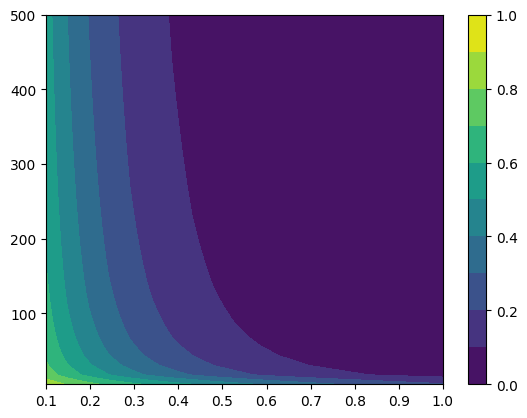

In [ ]:
fig, ax=plt.subplots()
levels = np.linspace(0.0, 1.0, 11)
cset1= ax.contourf(As,Us, outside_interval, levels=levels)
cset1.set_clim(0, 1.0)
fig.colorbar(cset1, ax=ax)

plt.show()

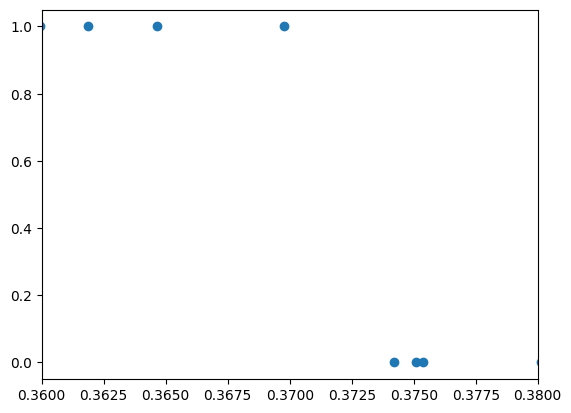

(40, 20) (20, 40)
min value which doesn't converge: 0.3742072490642886
max value which does converge:    0.36976774539023605


In [ ]:
plt.scatter(outside_interval, convergence_indicator_mat.T)
plt.xlim(0.36,0.38)
plt.show()
print(outside_interval.shape,convergence_indicator_mat.shape)
yes_conv = outside_interval[convergence_indicator_mat.T==1]
no_conv = outside_interval[convergence_indicator_mat.T==0]
print(f"min value which doesn't converge: {np.min(no_conv)}")
print(f"max value which does converge:    {np.max(yes_conv)}")

A little different! 37 percent?

Change n

In [51]:

xm = 2                              #>0

l,u = xm+0.01,xm+40                 #bounds for calculating
n = 50                             #amount of points of Gaussian quadrature

In [52]:
N_a = 20
N_u = 40

arr_a = np.linspace(0.1, 1, N_a)
arr_u = np.linspace(5, 500, N_u)
As, Us = np.meshgrid(arr_a,arr_u)

convergence_indicator_mat = np.zeros((N_a,N_u))

for i in range(N_a):
    a = arr_a[i]
    for j in range(N_u):
        u = arr_u[j]
        ob_pareto = MaxEnt(l, u, n, b(a,xm), f_pareto, message=False)
        ob_pareto._algorithm(50, warning=False)
        if(ob_pareto._converges):
            convergence_indicator_mat[i][j] = 1
        else:
            convergence_indicator_mat[i][j] = 0

outside_interval = 1-cdf_pareto(Us,As,xm)+cdf_pareto(l,As,xm)

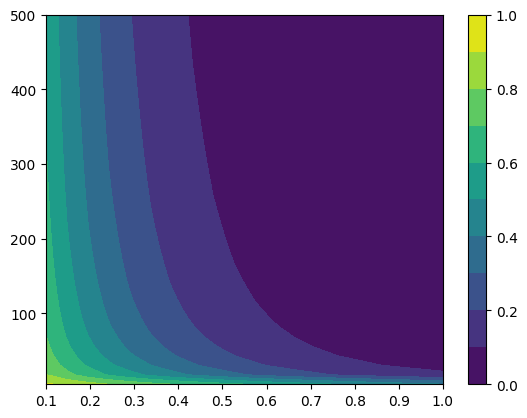

In [53]:
fig, ax=plt.subplots()
levels = np.linspace(0.0, 1.0, 11)
cset1= ax.contourf(As,Us, outside_interval, levels=levels)
cset1.set_clim(0, 1.0)
fig.colorbar(cset1, ax=ax)

plt.show()

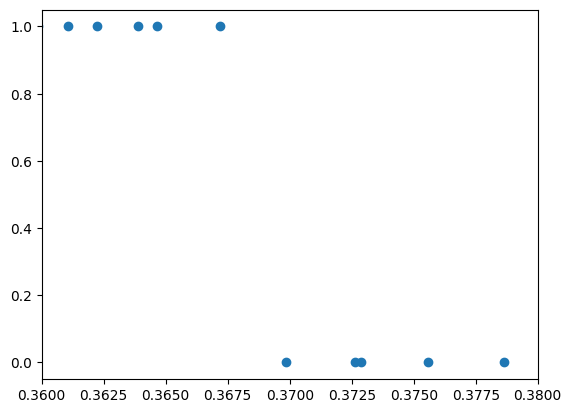

(40, 20) (20, 40)
min value which doesn't converge: 0.3698654552906875
max value which does converge:    0.36720366064512
avg. value of the two: 0.7370691159358075


In [54]:
plt.scatter(outside_interval, convergence_indicator_mat.T)
plt.xlim(0.36,0.38)
plt.show()
print(outside_interval.shape,convergence_indicator_mat.shape)
yes_conv = outside_interval[convergence_indicator_mat.T==1]
no_conv = outside_interval[convergence_indicator_mat.T==0]
print(f"min value which doesn't converge: {np.min(no_conv)}")
print(f"max value which does converge:    {np.max(yes_conv)}")
print(f"avg. value of the two: {np.min(no_conv)+np.max(yes_conv)}")

In [102]:
def test_percentage_barrier_pareto(l,n,xm, figure1=True,figure2=True,figure3=True,short=False):
    N_a = 20
    N_u = 30

    arr_a = np.linspace(0.1, 1, N_a)
    arr_u = np.linspace(3+xm, 300+xm, N_u)
    As, Us = np.meshgrid(arr_a,arr_u)

    convergence_indicator_mat = np.zeros((N_a,N_u))
    error_lambda = np.full((N_a,N_u),100,dtype=float)

    for i in range(N_a):
        a = arr_a[i]
        for j in range(N_u):
            u = arr_u[j]
            ob_pareto = MaxEnt(l, u, n, b(a,xm), f_pareto, message=False)
            ob_pareto._algorithm(50, warning=False)
            if(ob_pareto._converges):
                convergence_indicator_mat[i][j] = 1
                error_lambda[i][j] = ob_pareto._calc_error(to_lagrange_pareto(a,xm))
            else:
                convergence_indicator_mat[i][j] = 0

    inside_interval = cdf_pareto(Us,As,xm)-cdf_pareto(l,As,xm)

    if(figure1):
        fig, ax=plt.subplots(1,2,sharey=True,sharex=True, figsize=(10,5))
        ax[0].set_title(f"Convergence?") 
        ax[0].set_xlabel("$a$")
        ax[0].set_ylabel("$u$")

        cset1 = ax[0].contourf(As,Us,convergence_indicator_mat.T, levels=1)
        fig.colorbar(cset1, ax=ax[0])

        ax[1].set_title(f"Percentage of mass inside $[{l},u]$") 
        ax[1].set_xlabel("$a$")

        levels = np.linspace(0.0, 1.0, 11)
        cset2= ax[1].contourf(As,Us, inside_interval, levels=levels)
        cset2.set_clim(0, 1.0)
        fig.colorbar(cset2, ax=ax[1])
        fig.suptitle(f"Pareto($a$,{xm})")
        plt.tight_layout()
        plt.show()
    
    if(figure2):
        with plt.style.context("ggplot"):
            fig, ax = plt.subplots()
            ax.scatter(inside_interval, convergence_indicator_mat.T)
            ax.set_xlim(1-0.38,1-0.36)
            ax.set_xlabel("Percentage of prob. mass inside $[l,u]$")
            ax.set_ylabel("Convergence?")
            ax.set_title(f"Convergence of algorithm on Pareto($a$,{xm})")

            plt.show()
    
    if(figure3):
        with plt.style.context("ggplot"):
            fig, ax=plt.subplots(1,2,figsize=(10,5))
            ax[0].set_title(f"Error of $\\lambda$") 
            ax[0].set_xlabel("$a$")
            ax[0].set_ylabel("$u$")

            levels = np.linspace(0.0, 0.5, 11)
            cset1 = ax[0].contourf(As,Us,error_lambda.T, levels=levels)
            fig.colorbar(cset1, ax=ax[0])

            ax[1].scatter(inside_interval, error_lambda.T)
            # ax[1].set_xlim(1-0.38,1-0.36)
            ax[1].set_ylim((0,2))
            ax[1].set_xlim((.65,1))
            ax[1].set_xlabel("Percentage of prob. mass inside $[l,u]$")
            ax[1].set_ylabel("Error_lambda")
            ax[1].set_title(f"Quality of solution on Pareto($a$,{xm})")

            plt.tight_layout()
            plt.show()

    yes_conv = inside_interval[convergence_indicator_mat.T==1]
    no_conv = inside_interval[convergence_indicator_mat.T==0]
    if(short):
        print(f"l={l} || n={n} || xm={xm} || boundary={(np.max(no_conv)+np.min(yes_conv))/2:.4f}")
    else:
        print(f"max value which doesn't converge: {np.max(no_conv)}")
        print(f"min value which does converge:    {np.min(yes_conv)}")
        print(f"avg. value of the two: {(np.max(no_conv)+np.min(yes_conv))/2}")

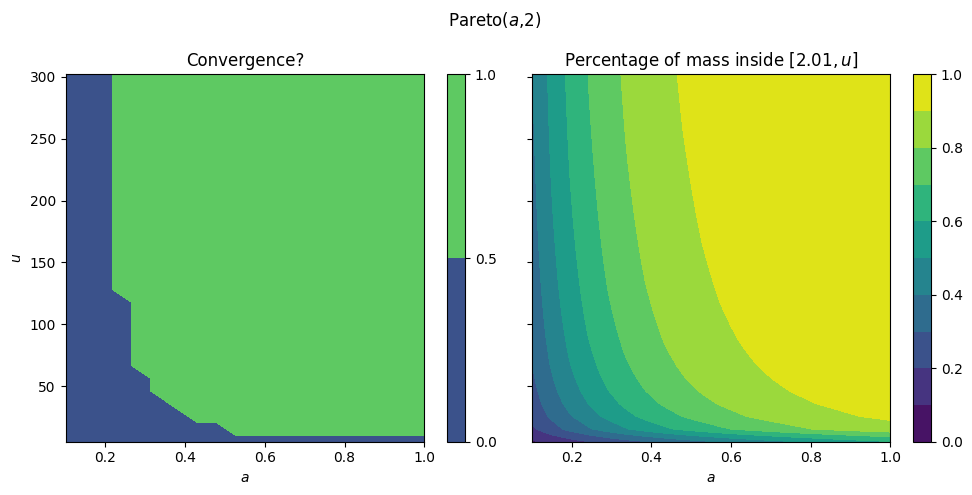

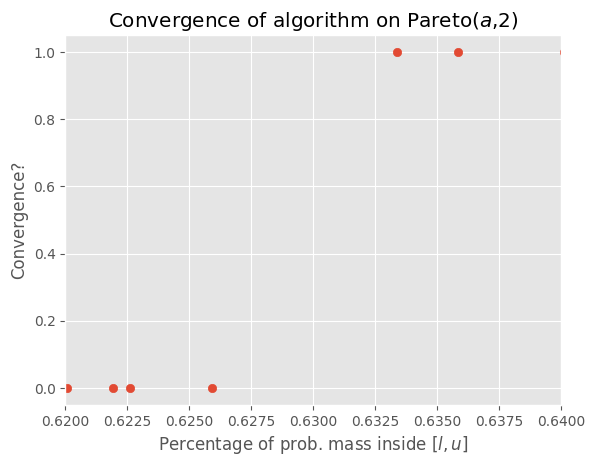

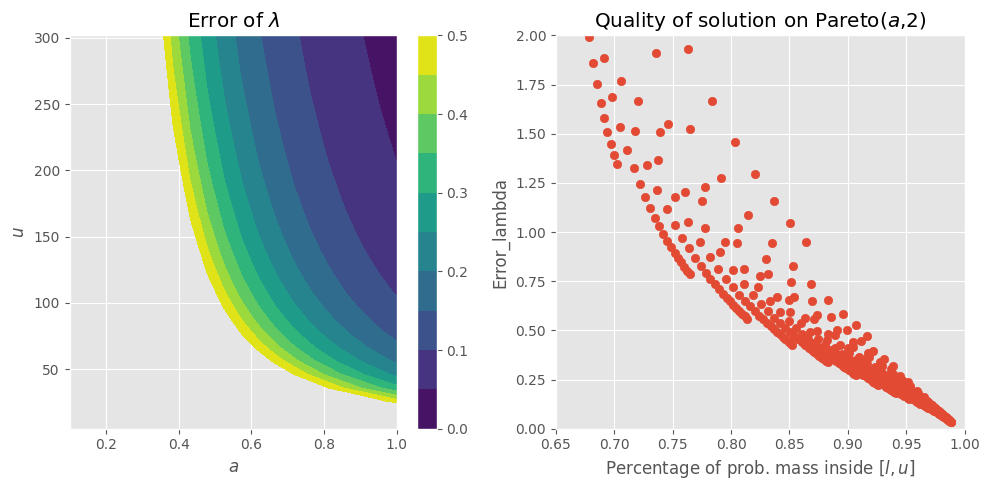

max value which doesn't converge: 0.6259080419024281
min value which does converge:    0.6333673117303119
avg. value of the two: 0.6296376768163701


In [103]:
xm = 2                             #>0

l,u = xm+0.01, xm+40               #bounds for calculating
n = 50                             #amount of points of Gaussian quadrature

test_percentage_barrier_pareto(l,n,xm,figure1=True, figure2=True,figure3=True,short=False)

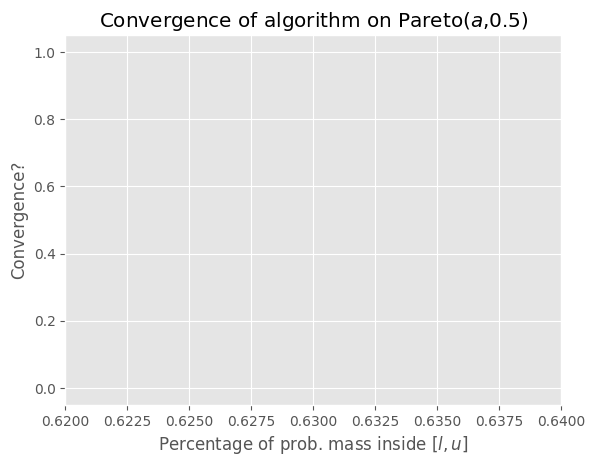

max value which doesn't converge: 0.4251451916300144
min value which does converge:    0.12104032402443132
avg. value of the two: 0.27309275782722287


In [63]:

test_percentage_barrier_pareto(l,n,xm=0.5,figure1=False,figure2=True)

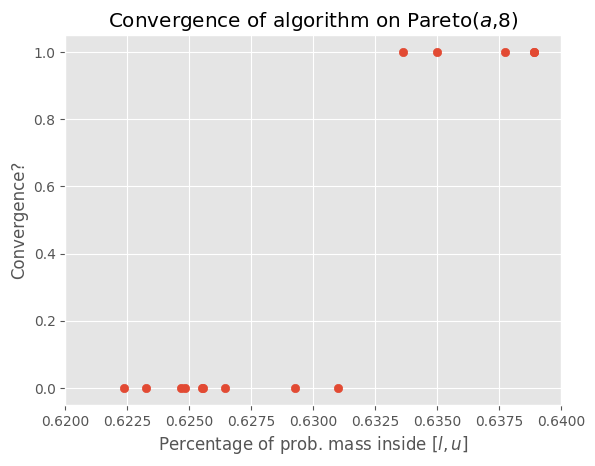

max value which doesn't converge: 0.6309889879173032
min value which does converge:    0.6336023307166219
avg. value of the two: 0.6322956593169625


In [64]:
test_percentage_barrier_pareto(l=8.001,n=50,xm=8,figure1=False, figure2=True)

In [65]:
test_percentage_barrier_pareto(l=2.01,n=300,xm=2,figure1=False, figure2=False)

max value which doesn't converge: 0.6259080419024281
min value which does converge:    0.6333673117303119
avg. value of the two: 0.6296376768163701


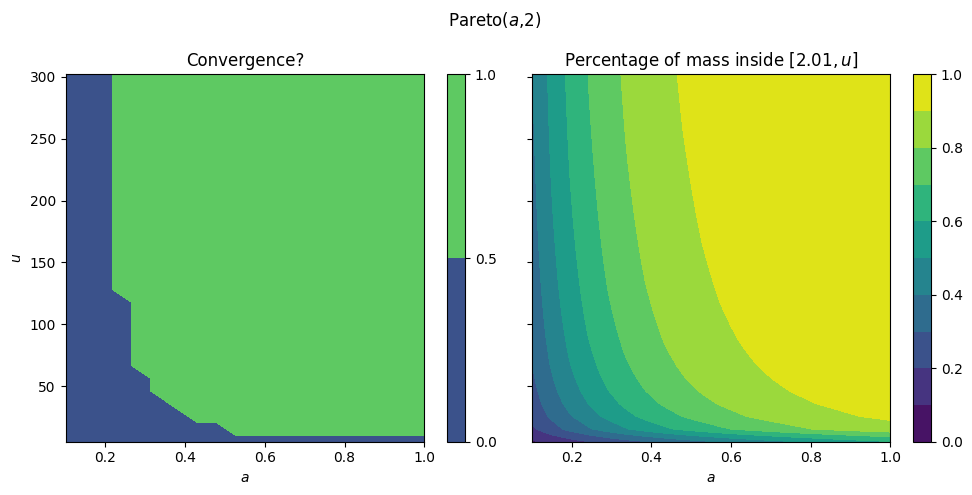

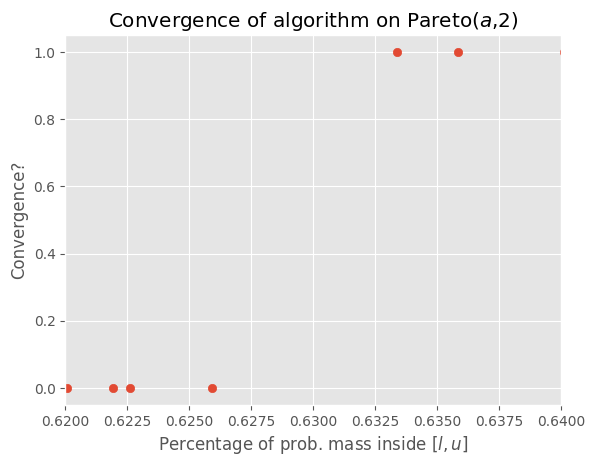

l=2.01 || n=180 || xm=2 || boundary=0.6296376768163701


In [66]:
test_percentage_barrier_pareto(l=2.01,n=180,xm=2,figure1=True, figure2=True, short=True)

In [ ]:
ns = [40,100,300]
ls = [0.00001,0.001,0.1] #boundary is ls+xm
xms = [1, 8, 20]

for xm in xms:
    for l in ls:
        for n in ns:
            test_percentage_barrier_pareto(l=xm+l,n=n,xm=xm,figure1=False, figure2=False, figure3=False, short=True)

l=1.00001 || n=40 || xm=1 || boundary=0.6333725338245983
l=1.00001 || n=100 || xm=1 || boundary=0.6333725338245983
l=1.00001 || n=300 || xm=1 || boundary=0.6333725338245983
l=1.001 || n=40 || xm=1 || boundary=0.6331798605838848
l=1.001 || n=100 || xm=1 || boundary=0.6331798605838848
l=1.001 || n=300 || xm=1 || boundary=0.6331798605838848
l=1.1 || n=40 || xm=1 || boundary=0.5977770103896836
l=1.1 || n=100 || xm=1 || boundary=0.5977770103896836
l=1.1 || n=300 || xm=1 || boundary=0.5977770103896836
l=8.00001 || n=40 || xm=8 || boundary=0.6323344093899848
l=8.00001 || n=100 || xm=8 || boundary=0.6323344093899848
l=8.00001 || n=300 || xm=8 || boundary=0.6323344093899848
l=8.001 || n=40 || xm=8 || boundary=0.6322956593169625
l=8.001 || n=100 || xm=8 || boundary=0.6322956593169625
l=8.001 || n=300 || xm=8 || boundary=0.6322956593169625
l=8.1 || n=40 || xm=8 || boundary=0.6282835556412085
l=8.1 || n=100 || xm=8 || boundary=0.6282835556412085
l=8.1 || n=300 || xm=8 || boundary=0.628283555641208

Conclusion:
- Larger $n$ does NOT make a difference
- lower bound $l$ DOES matter: lower -> more mass needed in the interval (don't know if it increases exactly like the cdf)
- $x_m$ DOES matter, slightly: order less than 1%. $x_m$ higher -> more mass needed in interval 
- BUT all these parameters have outcomes between 62.9% and 63.3%. If more than that percentage is in the interval, the algorithm should converge. This is good!

Next:
- If it converges, how good is the approximation?
- How to measure 'goodness'? (maybe elena has idea)